Importe de librerias

In [262]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter
from itertools import combinations
%matplotlib inline

# Exploracion de los datos

## Cargar los datos

In [263]:
data = pd.read_csv("CAvideos_cc50_202101.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)


In [264]:
with open('CA_category_id.json') as f:
    category_data = json.load(f)

category_data

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [265]:
#esto es para poder acceder a los normbres de las categorias
categories_dict = {item['id']: item['snippet']['title'] for item in category_data['items']}
data['category_id'] = data['category_id'].astype(str)
#data['category_name'] = data['category_id'].map(categories_dict)

## Inspeccionar los datos

Como equipo, exploraremos los datos, verificando, por ejemplo: estructura, 
tipo, valores de los datos, nombre de columnas, creación de tablas de 
frecuencia

In [266]:
type(data)

pandas.core.frame.DataFrame

In [267]:
type(category_data)

dict

In [268]:
data.describe()

,views,likes,dislikes,comment_count,lat,lon
count,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881.000000,40881.000000
mean,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,52.025876,-88.817702
std,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,7.213076,25.119498
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.566645,-139.000002
25%,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,46.249282,-110.733329
50%,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,49.822578,-81.236083
75%,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,53.016698,-64.347995
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.767467,-57.426919


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  object 
 1   trending_date           40881 non-null  object 
 2   title                   40881 non-null  object 
 3   channel_title           40881 non-null  object 
 4   category_id             40881 non-null  object 
 5   publish_time            40881 non-null  object 
 6   tags                    40881 non-null  object 
 7   views                   40881 non-null  int64  
 8   likes                   40881 non-null  int64  
 9   dislikes                40881 non-null  int64  
 10  comment_count           40881 non-null  int64  
 11  thumbnail_link          40881 non-null  object 
 12  comments_disabled       40881 non-null  bool   
 13  ratings_disabled        40881 non-null  bool   
 14  video_error_or_removed  40881 non-null

In [270]:
len(data.video_id.unique())

24427

Se observa que el total de datos son 40881, sin embargo, solo 24427 tienen video_id unico

In [271]:
data.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'state', 'lat', 'lon', 'geometry'], dtype=object)

### Verificacion de duplicados de datos

In [272]:
data[data.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry


In [273]:
data[data['video_id'].duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
200,0dBIkQ4Mz1M,17.15.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",2649977,193479,3496,17846,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
214,n1WpP7iowLc,17.15.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",20539417,840642,47715,124236,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
216,teXaL6GdQRk,17.15.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes|""Jokes de Papa""|""Stranger Thing...",443131,27026,491,746,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
218,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188675,88100,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Newfoundland And Labrador,49.174400,-57.426919,POINT (-57.42691878 49.17440025)
219,5qpjK5DgCt4,17.15.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",4326684,167696,6730,9265,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Prince Edward Island,46.249282,-63.131325,POINT (-63.13132512 46.24928164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40868,9gkxwIZPOZk,18.14.06,HTC U12+ Review: A Phone With No Buttons!,Marques Brownlee,28,2018-06-12T20:33:06.000Z,"HTC U12|""HTC""|""U12""|""U12+U12 Plus""|""HTC U12+""|...",793685,30147,762,3620,https://i.ytimg.com/vi/9gkxwIZPOZk/default.jpg,False,False,False,"HTC U12+ has no notch, flagships specs and a p...",Quebec,49.822578,-64.347995,POINT (-64.34799504 49.82257774)
40870,6Mf2ylffKws,18.14.06,Ridiculous Actor Demands That Forced Movie Det...,Looper,24,2018-06-12T14:00:01.000Z,"actor|""actors""|""actor demands""|""ridiculous act...",362153,5568,173,680,https://i.ytimg.com/vi/6Mf2ylffKws/default.jpg,False,False,False,"If you're new, Subscribe! → http://bit.ly/Subs...",Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
40873,i1Zym3v8tL4,18.14.06,"Cyberpunk 2077 Story, Open World, And First-Pe...",GameSpot,24,2018-06-12T21:47:37.000Z,"game|""games""|""video game""|""gaming""|""gameplay""|...",774509,10250,1246,5516,https://i.ytimg.com/vi/i1Zym3v8tL4/default.jpg,False,False,False,CD Projekt Red joined us on our E3 2018 stage ...,Newfoundland And Labrador,49.174400,-57.426919,POINT (-57.42691878 49.17440025)
40874,4uO08Lr5g3k,18.14.06,Masterchef | Stand-up Comedy by Karunesh Talwar,Karunesh Talwar,22,2018-06-12T13:08:59.000Z,"Karunesh Talwar|""AIB""|""Abhishek Upmanyu""|""Canv...",505968,28369,434,1270,https://i.ytimg.com/vi/4uO08Lr5g3k/default.jpg,False,False,False,These are some jokes about Masterchef Australi...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)


In [274]:
data[data.duplicated(subset=['video_id', 'title'])]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
200,0dBIkQ4Mz1M,17.15.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",2649977,193479,3496,17846,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
214,n1WpP7iowLc,17.15.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",20539417,840642,47715,124236,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
216,teXaL6GdQRk,17.15.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes|""Jokes de Papa""|""Stranger Thing...",443131,27026,491,746,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
218,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188675,88100,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Newfoundland And Labrador,49.174400,-57.426919,POINT (-57.42691878 49.17440025)
219,5qpjK5DgCt4,17.15.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",4326684,167696,6730,9265,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Prince Edward Island,46.249282,-63.131325,POINT (-63.13132512 46.24928164)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40868,9gkxwIZPOZk,18.14.06,HTC U12+ Review: A Phone With No Buttons!,Marques Brownlee,28,2018-06-12T20:33:06.000Z,"HTC U12|""HTC""|""U12""|""U12+U12 Plus""|""HTC U12+""|...",793685,30147,762,3620,https://i.ytimg.com/vi/9gkxwIZPOZk/default.jpg,False,False,False,"HTC U12+ has no notch, flagships specs and a p...",Quebec,49.822578,-64.347995,POINT (-64.34799504 49.82257774)
40870,6Mf2ylffKws,18.14.06,Ridiculous Actor Demands That Forced Movie Det...,Looper,24,2018-06-12T14:00:01.000Z,"actor|""actors""|""actor demands""|""ridiculous act...",362153,5568,173,680,https://i.ytimg.com/vi/6Mf2ylffKws/default.jpg,False,False,False,"If you're new, Subscribe! → http://bit.ly/Subs...",Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
40873,i1Zym3v8tL4,18.14.06,"Cyberpunk 2077 Story, Open World, And First-Pe...",GameSpot,24,2018-06-12T21:47:37.000Z,"game|""games""|""video game""|""gaming""|""gameplay""|...",774509,10250,1246,5516,https://i.ytimg.com/vi/i1Zym3v8tL4/default.jpg,False,False,False,CD Projekt Red joined us on our E3 2018 stage ...,Newfoundland And Labrador,49.174400,-57.426919,POINT (-57.42691878 49.17440025)
40874,4uO08Lr5g3k,18.14.06,Masterchef | Stand-up Comedy by Karunesh Talwar,Karunesh Talwar,22,2018-06-12T13:08:59.000Z,"Karunesh Talwar|""AIB""|""Abhishek Upmanyu""|""Canv...",505968,28369,434,1270,https://i.ytimg.com/vi/4uO08Lr5g3k/default.jpg,False,False,False,These are some jokes about Masterchef Australi...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)


Se eliminarán las filas con video_id que se han duplicado.

In [275]:
duplicated_ids = data[data['video_id'].duplicated()]['video_id'].unique()

data = data[~data['video_id'].isin(duplicated_ids)]


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14516 entries, 5 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                14516 non-null  object 
 1   trending_date           14516 non-null  object 
 2   title                   14516 non-null  object 
 3   channel_title           14516 non-null  object 
 4   category_id             14516 non-null  object 
 5   publish_time            14516 non-null  object 
 6   tags                    14516 non-null  object 
 7   views                   14516 non-null  int64  
 8   likes                   14516 non-null  int64  
 9   dislikes                14516 non-null  int64  
 10  comment_count           14516 non-null  int64  
 11  thumbnail_link          14516 non-null  object 
 12  comments_disabled       14516 non-null  bool   
 13  ratings_disabled        14516 non-null  bool   
 14  video_error_or_removed  14516 non-null

### Tabla de frecuencia de la variable objetivo

Ya que piden analizar la tendencia, nuestra variable objetivo serian las views

In [277]:
data.views.value_counts()

108967    3
141897    3
61941     3
9924      3
95771     2
         ..
60161     1
184655    1
131486    1
5288      1
107392    1
Name: views, Length: 14319, dtype: int64

## Visualizacion de los datos

**Variables numericas**

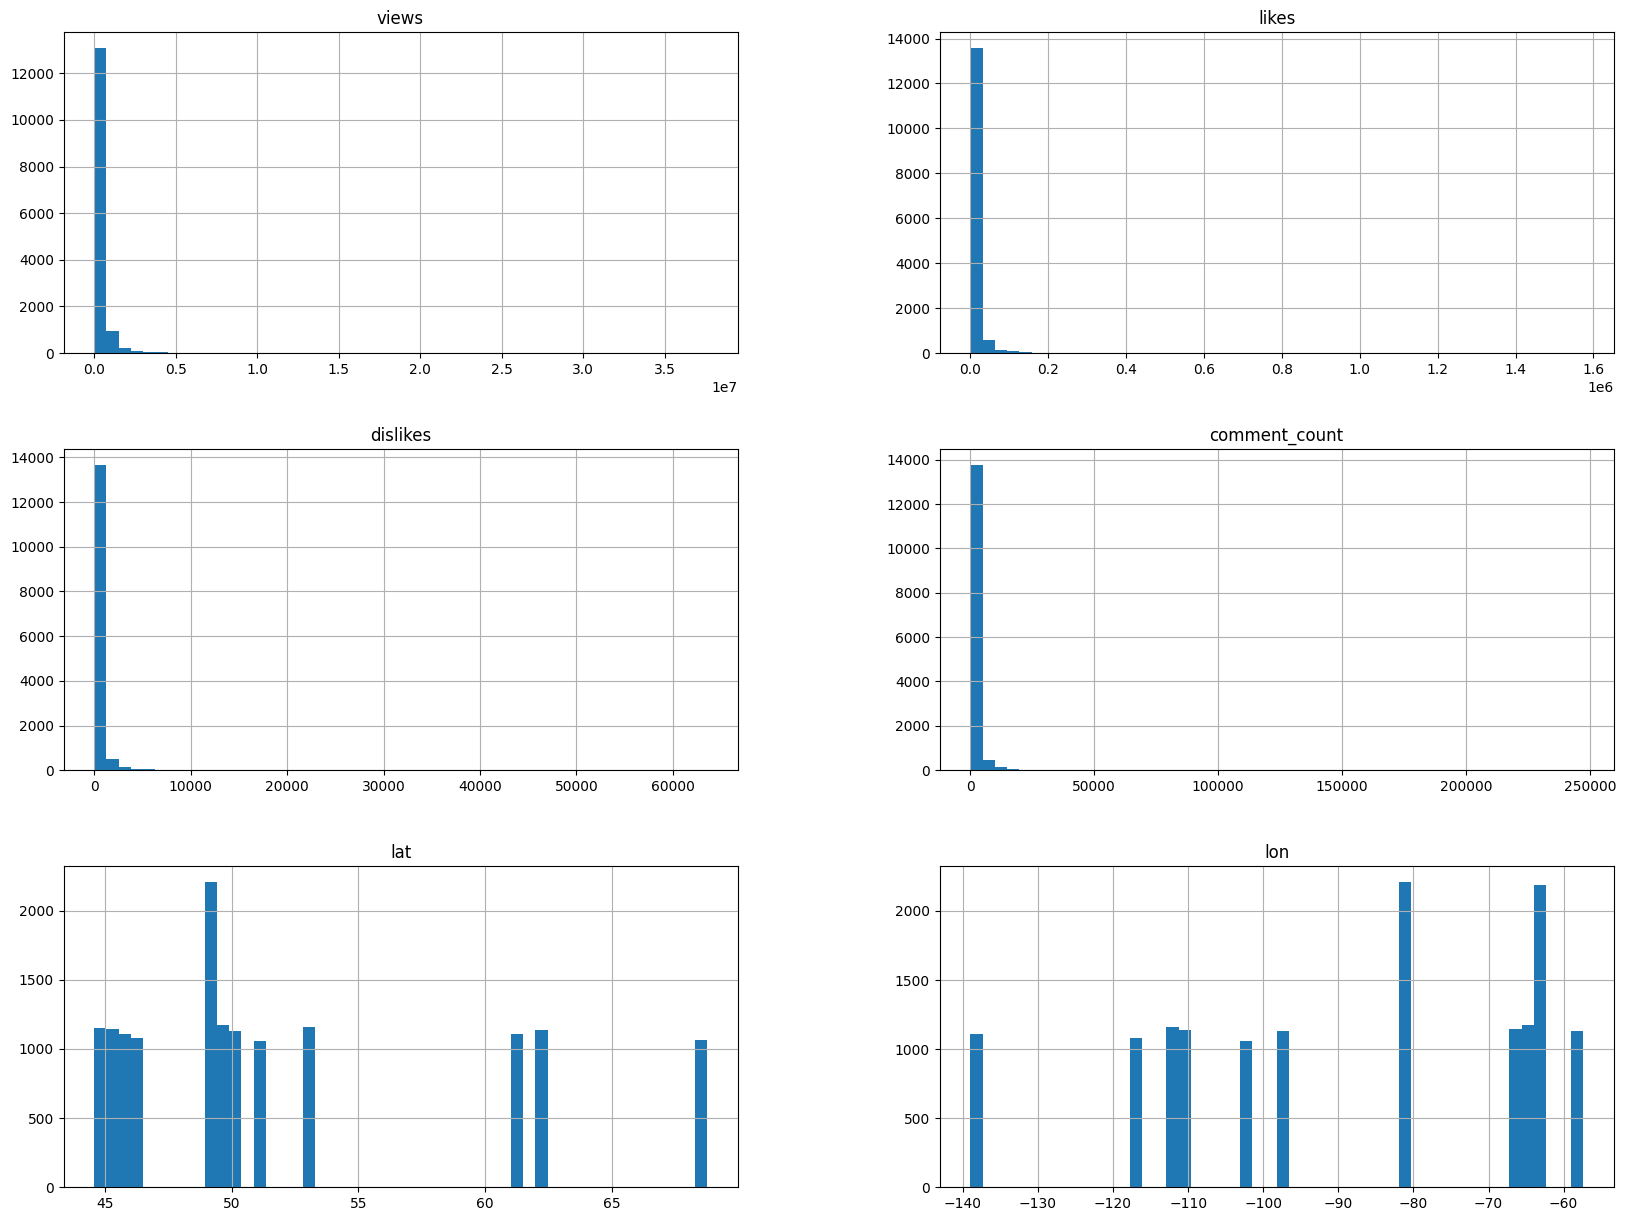

In [278]:
numericas= data.select_dtypes(include=['float64', 'int'])
numericas.hist(bins=50,figsize=(20,15))
plt.show()

**Variables categoricas**

In [280]:
categoricas = data.select_dtypes(include=['object','category', 'bool'])

In [281]:
categoricas.describe()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,geometry
count,14516,14516,14516,14516,14516,14516,14516,14516,14516,14516,14516,13775,14516,14516
unique,14516,204,14477,3688,16,14244,11345,14509,2,2,2,12385,13,13
top,0yIWz1XEeyc,17.14.11,Deleted video,VikatanTV,24,2018-04-06T13:00:03.000Z,[none],https://i.ytimg.com/vi/wpAmlGiQbiE/default.jpg,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,Quebec,POINT (-64.34799504 49.82257774)
freq,1,148,9,137,5065,4,1189,2,14270,14372,14506,98,1174,1174


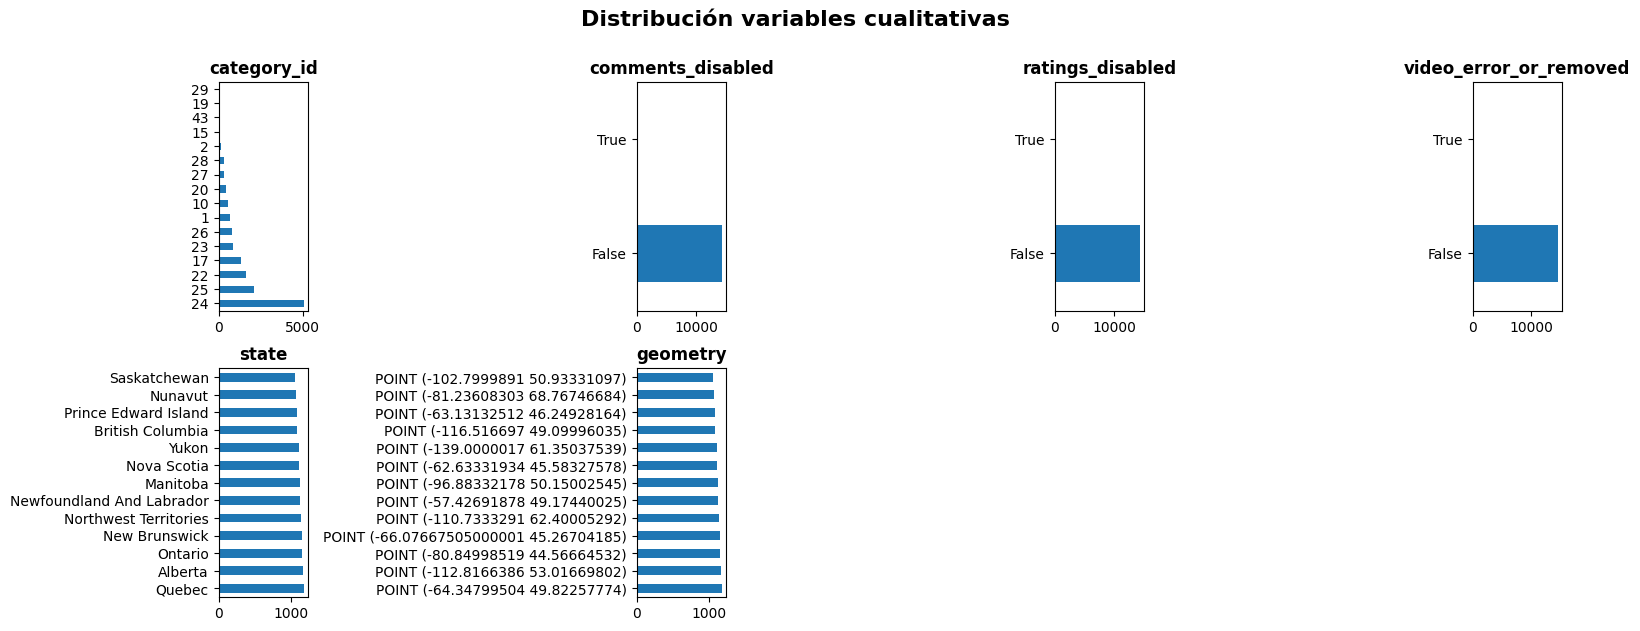

In [282]:
# Gráfico para cada variable cualitativa
columnas_object = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'state', 'geometry']

# Crear subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axes = axes.flat

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax=axes[i])
    axes[i].set_title(colum, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=10)
    axes[i].set_xlabel("")

for j in range(len(columnas_object), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Distribución variables cualitativas',
             fontsize=16, fontweight="bold")

plt.show()

**¿Qué categorías de videos son las de mayor tendencia?**

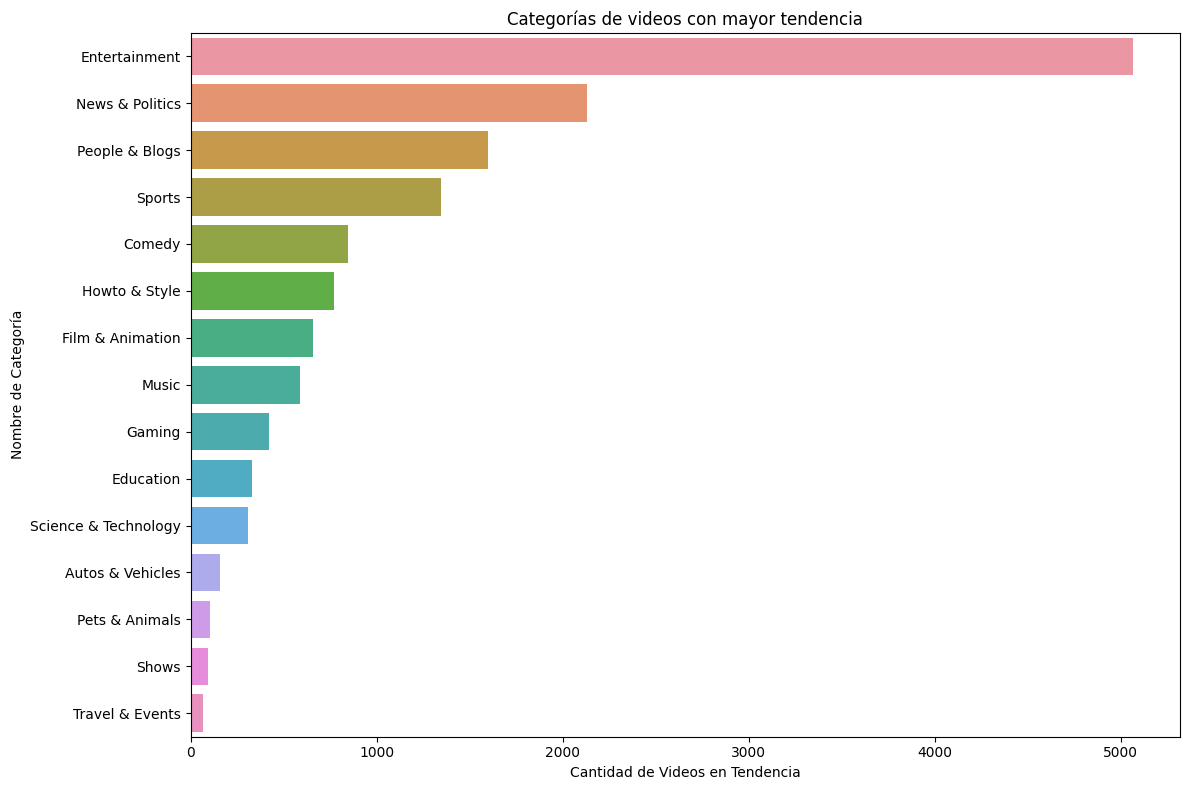

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

data['nombre_categoria'] = data['category_id'].map(categories_dict)

plt.figure(figsize=(12, 8))
sns.countplot(y='nombre_categoria', data=data, order=data['nombre_categoria'].value_counts().index)
plt.title('Categorías de videos con mayor tendencia')
plt.xlabel('Cantidad de Videos en Tendencia')
plt.ylabel('Nombre de Categoría')
plt.tight_layout()

plt.show()

data.drop(columns=['nombre_categoria'], inplace=True)  #eliminar columna temporal


**¿Que categorías de video tienen mas vistas?**

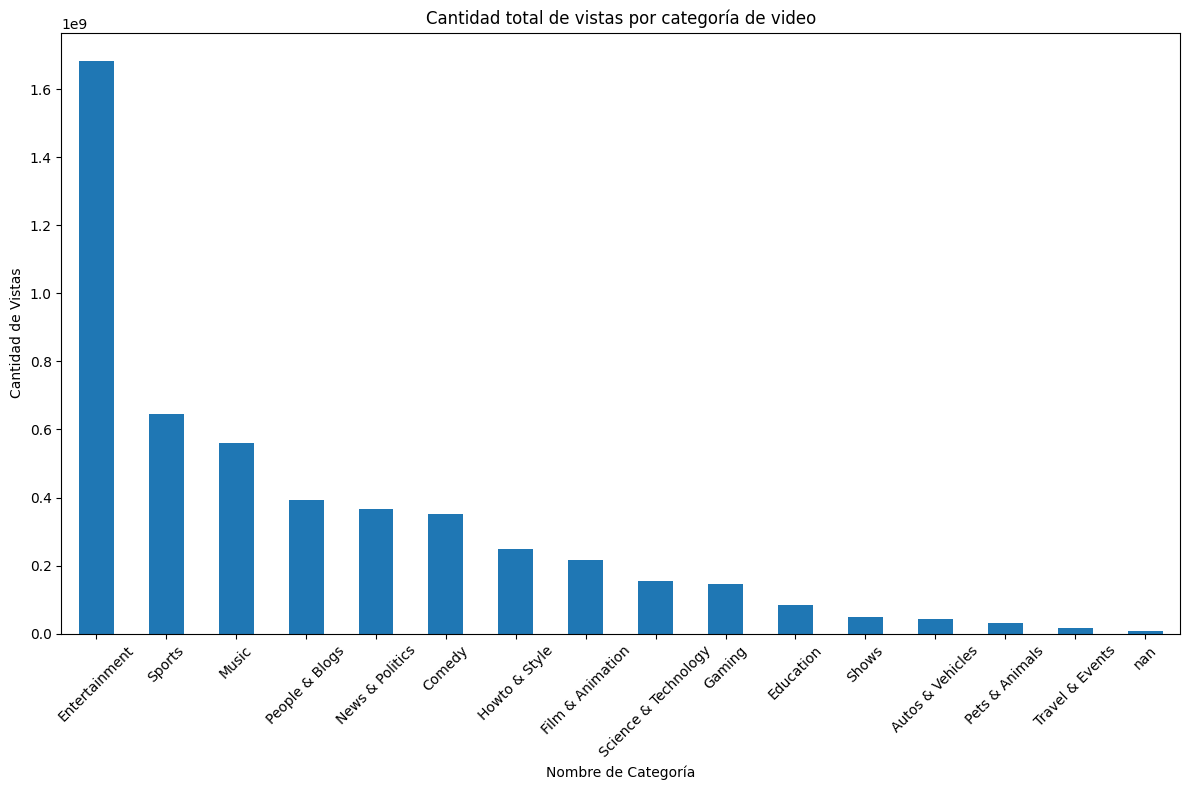

In [284]:
category_views = data.groupby('category_id')['views'].sum()

category_views.index = category_views.index.map(categories_dict)

category_views = category_views.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
category_views.plot(kind='bar')
plt.title('Cantidad total de vistas por categoría de video')
plt.xlabel('Nombre de Categoría')
plt.ylabel('Cantidad de Vistas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?**

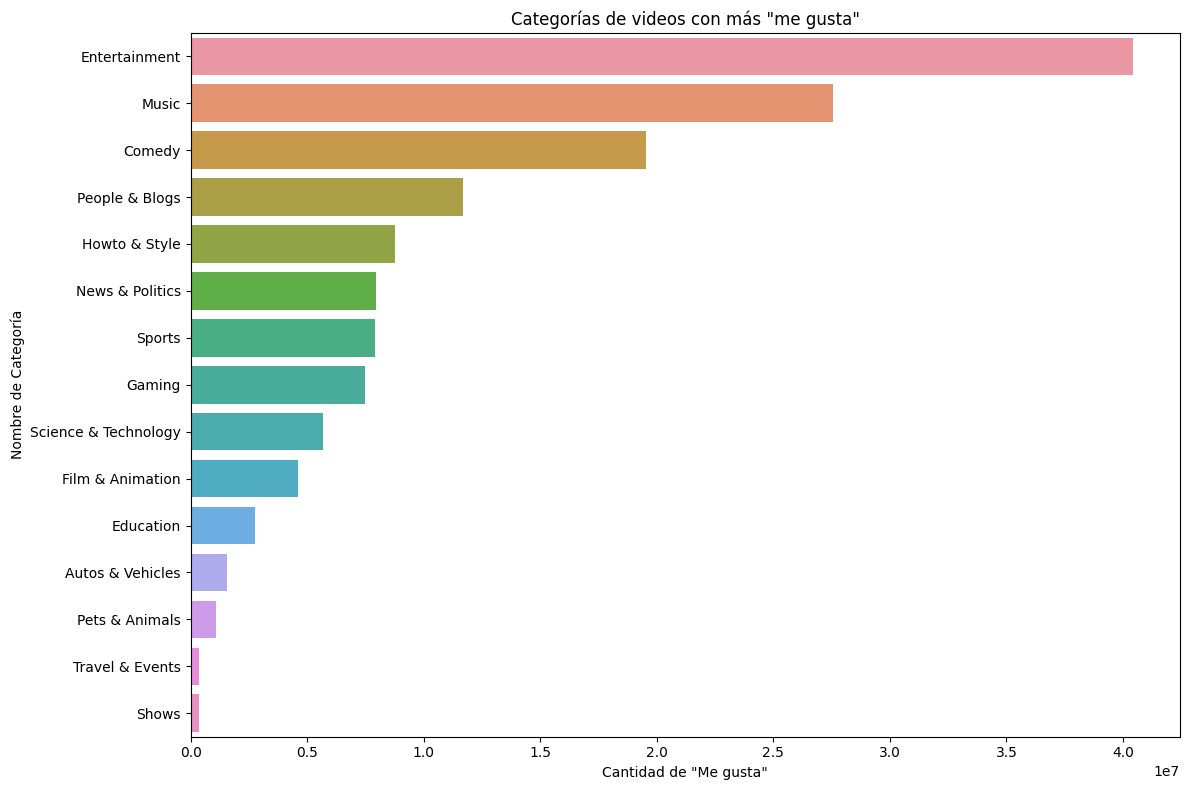

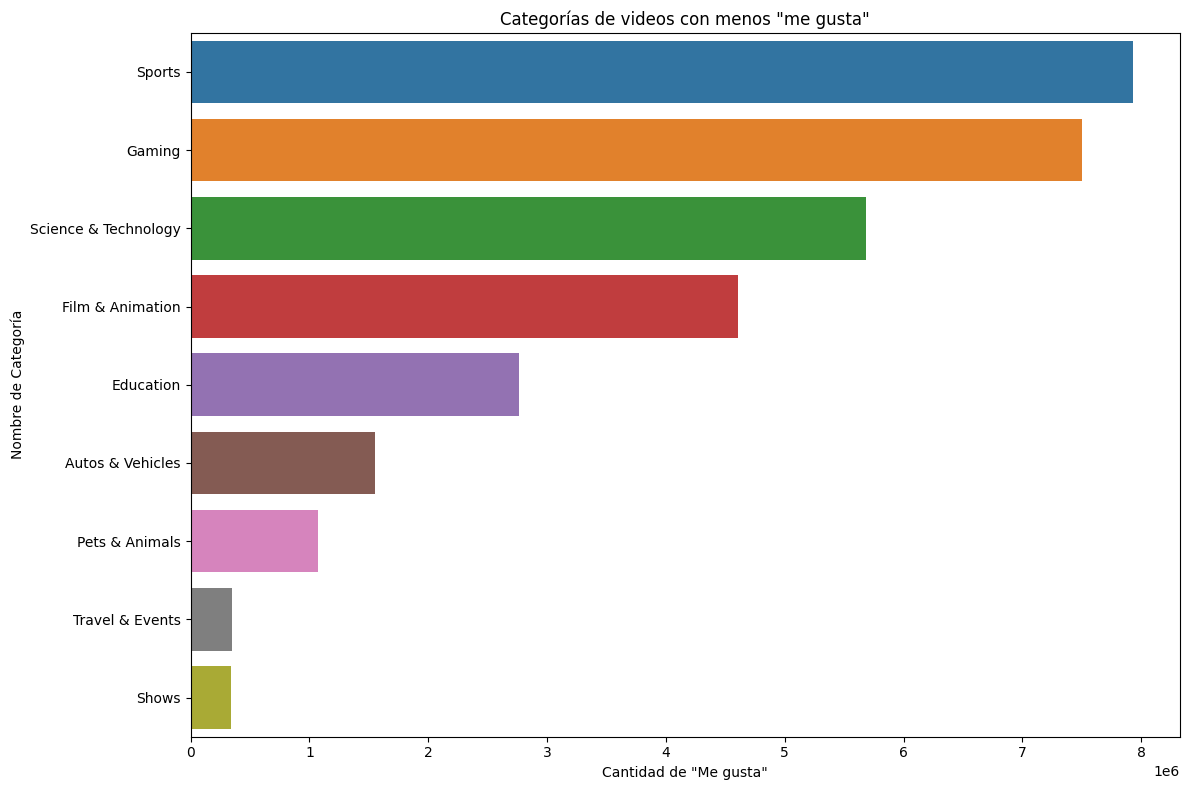

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

category_likes = data.groupby('category_id')['likes'].sum().reset_index()

category_likes['category_name'] = category_likes['category_id'].map(categories_dict)

category_likes_sorted = category_likes.sort_values(by='likes', ascending=False)

#más gustadas
plt.figure(figsize=(12, 8))
sns.barplot(y='category_name', x='likes', data=category_likes_sorted)
plt.title('Categorías de videos con más "me gusta"')
plt.xlabel('Cantidad de "Me gusta"')
plt.ylabel('Nombre de Categoría')
plt.tight_layout()

plt.show()

#menos gustadas
plt.figure(figsize=(12, 8))
sns.barplot(y='category_name', x='likes', data=category_likes_sorted.tail(10))
plt.title('Categorías de videos con menos "me gusta"')
plt.xlabel('Cantidad de "Me gusta"')
plt.ylabel('Nombre de Categoría')
plt.tight_layout()

plt.show()


**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me 
gusta”?**

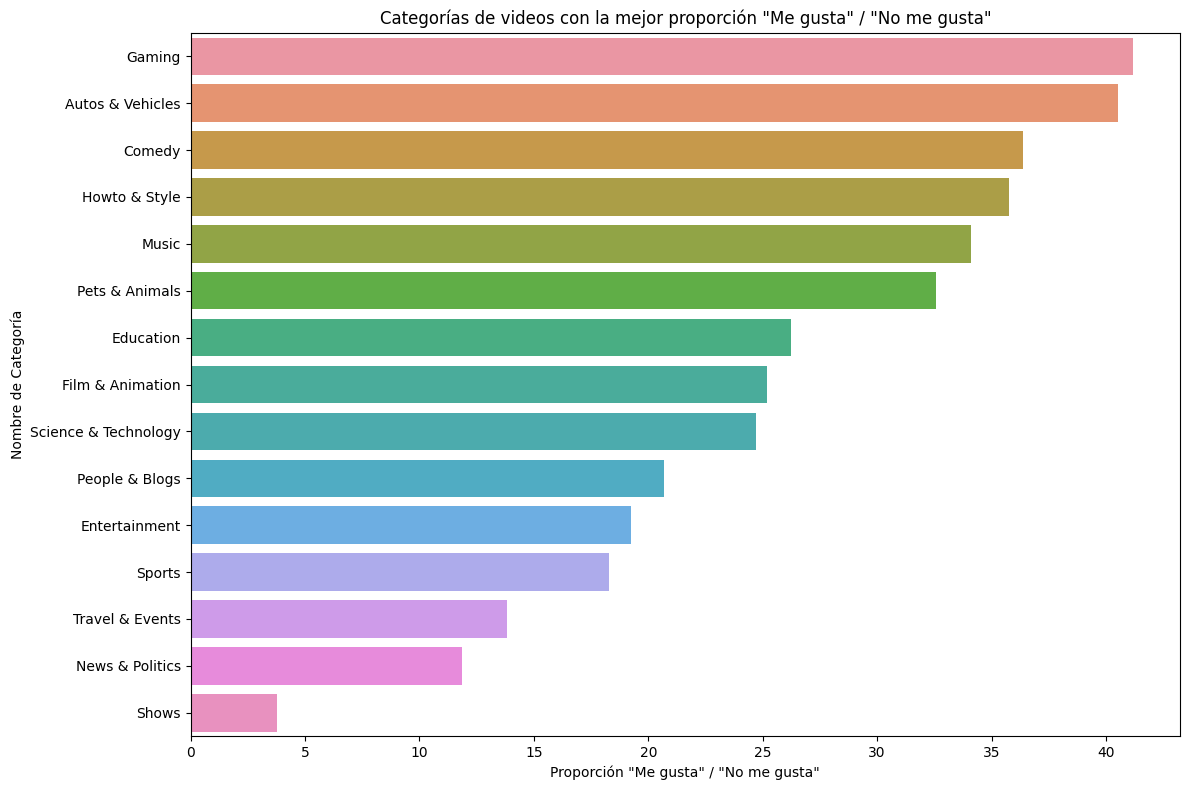

In [286]:

categories_dict = {item['id']: item['snippet']['title'] for item in category_data['items']}

category_likes_dislikes = data.groupby('category_id').agg({'likes': 'sum', 'dislikes': 'sum'}).reset_index()

category_likes_dislikes['ratio_likes_dislikes'] = category_likes_dislikes['likes'] / category_likes_dislikes['dislikes']

category_likes_dislikes['category_name'] = category_likes_dislikes['category_id'].map(categories_dict)

category_likes_dislikes_sorted = category_likes_dislikes.sort_values(by='ratio_likes_dislikes', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='category_name', x='ratio_likes_dislikes', data=category_likes_dislikes_sorted)
plt.title('Categorías de videos con la mejor proporción "Me gusta" / "No me gusta"')
plt.xlabel('Proporción "Me gusta" / "No me gusta"')
plt.ylabel('Nombre de Categoría')
plt.tight_layout()

plt.show()

**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / 
“Comentarios”?**

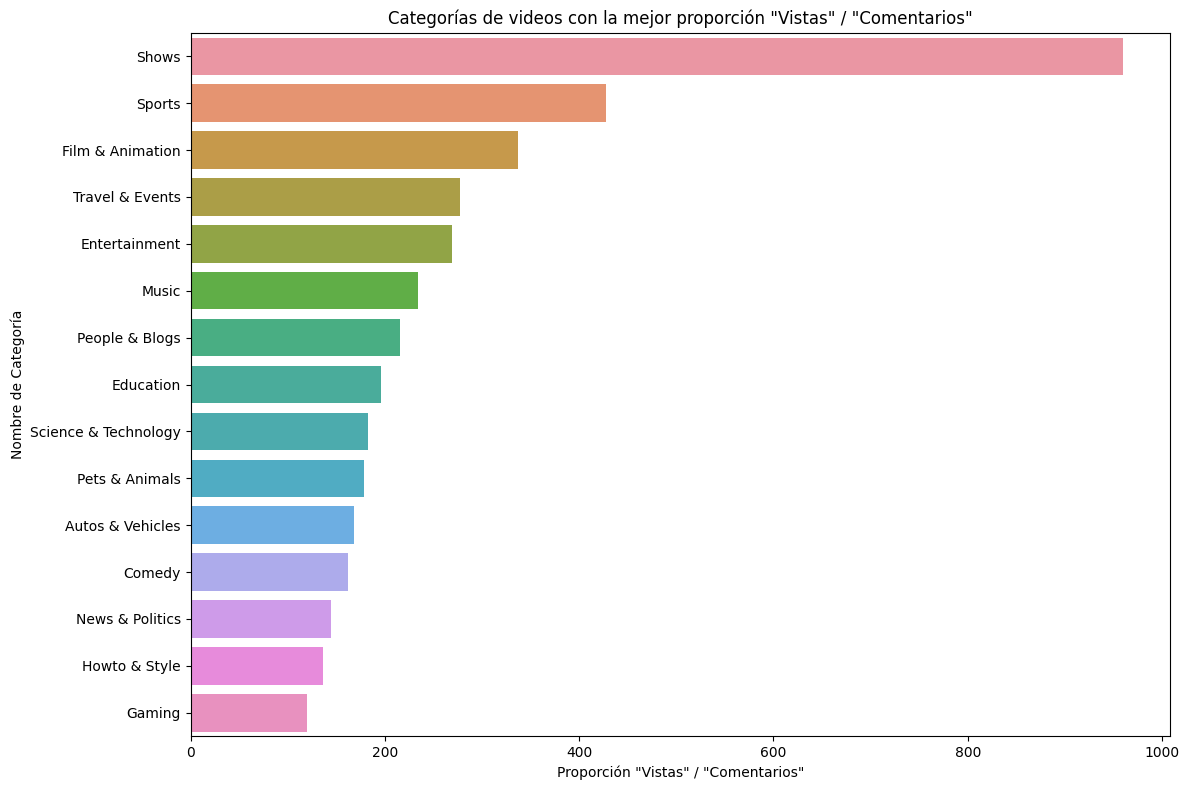

In [287]:


views_comments_by_category = data.groupby('category_id').agg({'views': 'sum', 'comment_count': 'sum'}).reset_index()

views_comments_by_category['ratio_views_comments'] = views_comments_by_category['views'] / views_comments_by_category['comment_count']

views_comments_by_category['category_name'] = views_comments_by_category['category_id'].map(categories_dict)

views_comments_sorted = views_comments_by_category.sort_values(by='ratio_views_comments', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='category_name', x='ratio_views_comments', data=views_comments_sorted)
plt.title('Categorías de videos con la mejor proporción "Vistas" / "Comentarios"')
plt.xlabel('Proporción "Vistas" / "Comentarios"')
plt.ylabel('Nombre de Categoría')
plt.tight_layout()

plt.show()

**¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

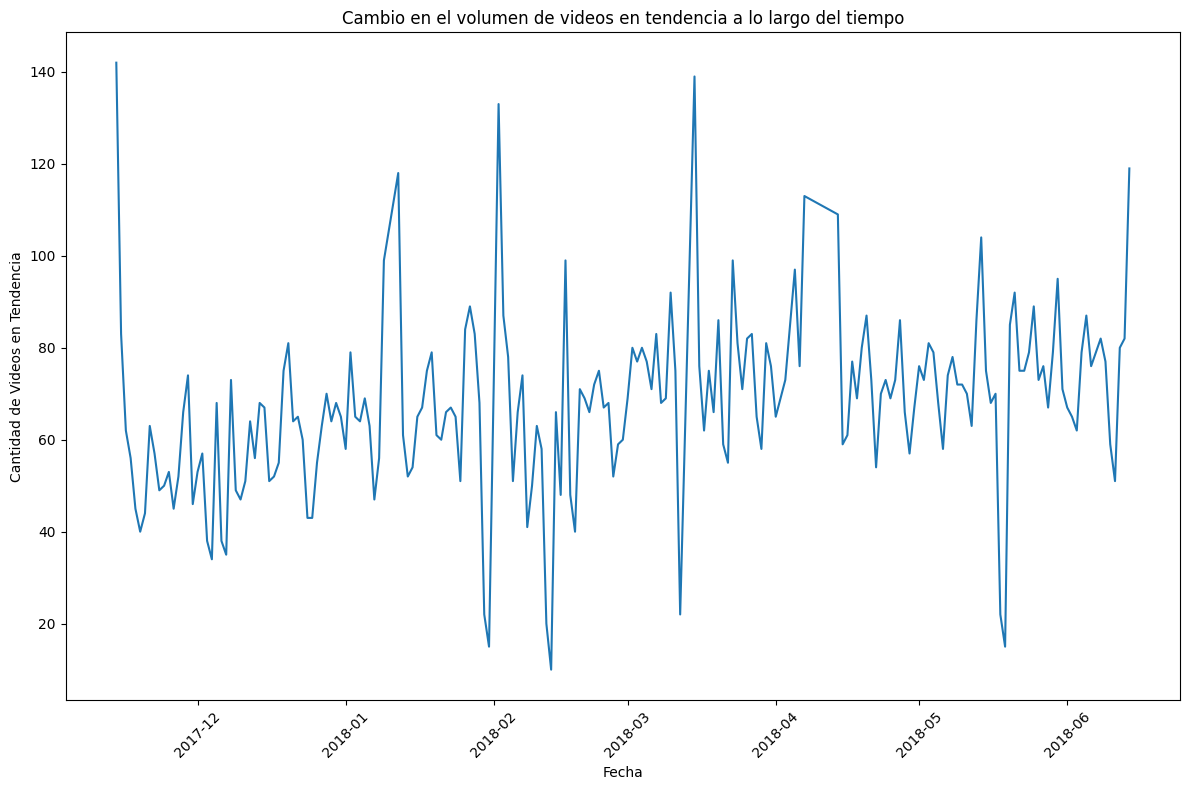

In [317]:
df = data.copy()
df['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

trending_count = data['trending_date'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x=trending_count.index, y=trending_count.values)
plt.title('Cambio en el volumen de videos en tendencia a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Videos en Tendencia')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?**

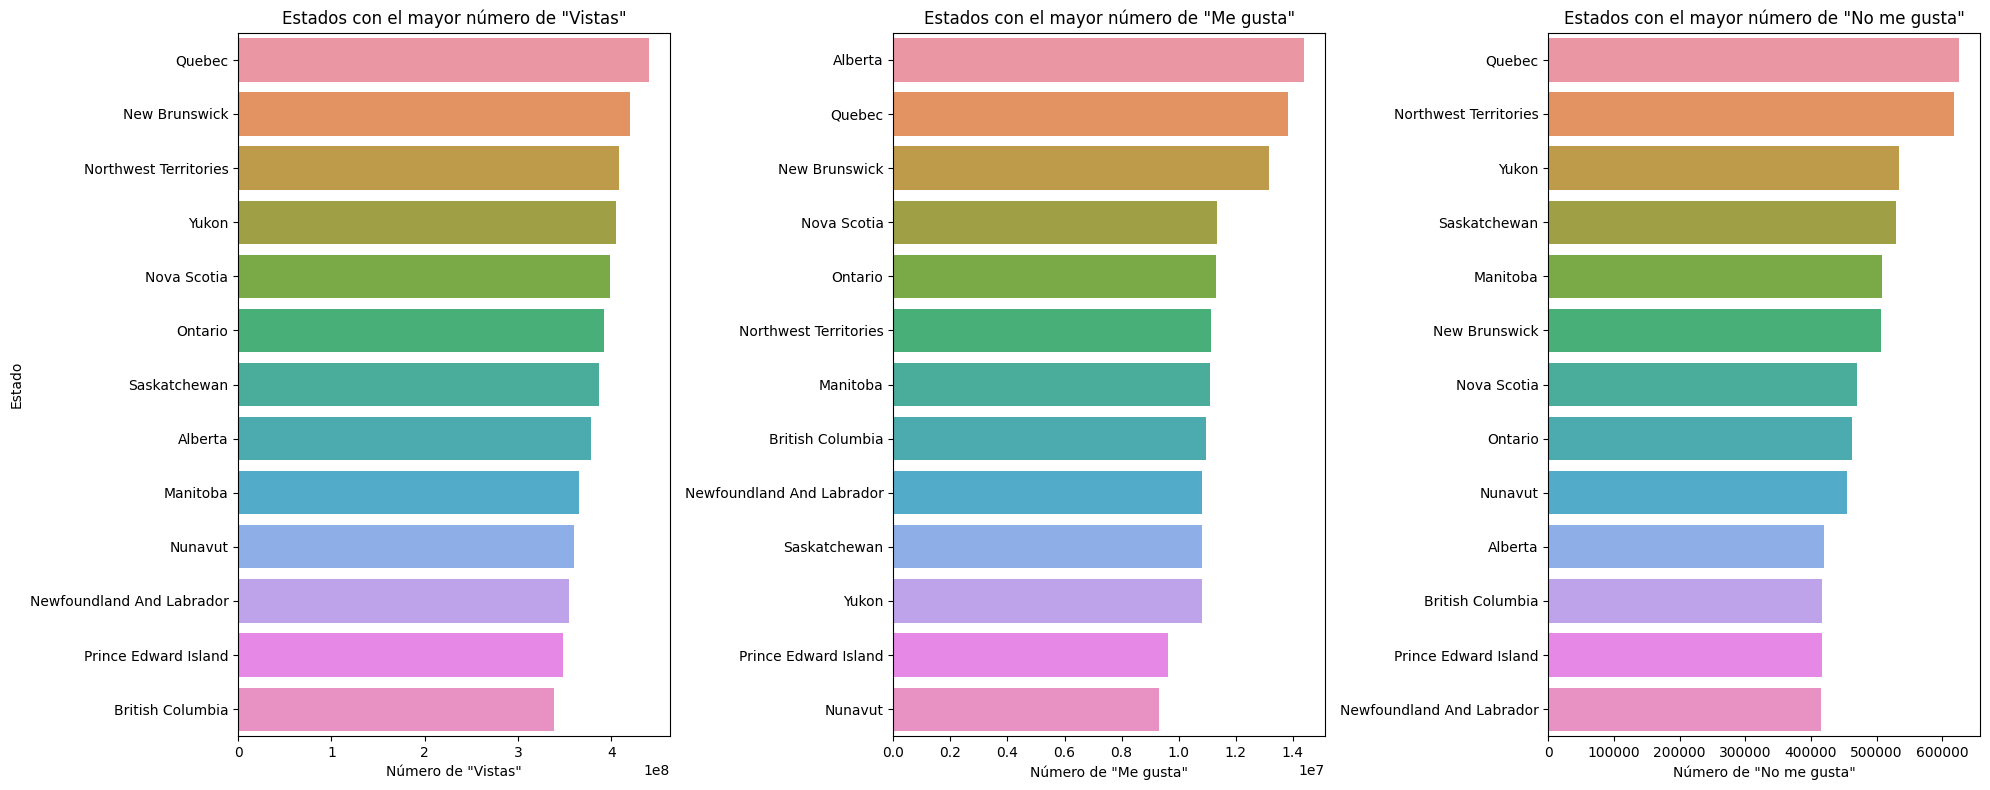

In [289]:
agregados_por_estado = data.groupby('state').agg({'views': 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()

vistas_por_estado_ordenadas = agregados_por_estado.sort_values(by='views', ascending=False)

me_gusta_por_estado_ordenadas = agregados_por_estado.sort_values(by='likes', ascending=False)

no_me_gusta_por_estado_ordenadas = agregados_por_estado.sort_values(by='dislikes', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

#views por estado
sns.barplot(y='state', x='views', data=vistas_por_estado_ordenadas, ax=axes[0])
axes[0].set_title('Estados con el mayor número de "Vistas"')
axes[0].set_xlabel('Número de "Vistas"')
axes[0].set_ylabel('Estado')

#likes por estado
sns.barplot(y='state', x='likes', data=me_gusta_por_estado_ordenadas, ax=axes[1])
axes[1].set_title('Estados con el mayor número de "Me gusta"')
axes[1].set_xlabel('Número de "Me gusta"')
axes[1].set_ylabel('')

# dislikes por estado
sns.barplot(y='state', x='dislikes', data=no_me_gusta_por_estado_ordenadas, ax=axes[2])
axes[2].set_title('Estados con el mayor número de "No me gusta"')
axes[2].set_xlabel('Número de "No me gusta"')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

**¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?**

Sí, es factible predecir el número de “Vistas”, “Me gusta” o “No me gusta” utilizando modelos de regresión, ya que estas variables numéricas pueden estar influenciadas por diversos factores como la categoría del video, el número de suscriptores del canal, la fecha de publicación, y otros datos del video. 

Además de ello, que tengamos estos datos históricos permiten la construcción de modelos predictivos

**¿Cuales son los tags más usados en los videos?**

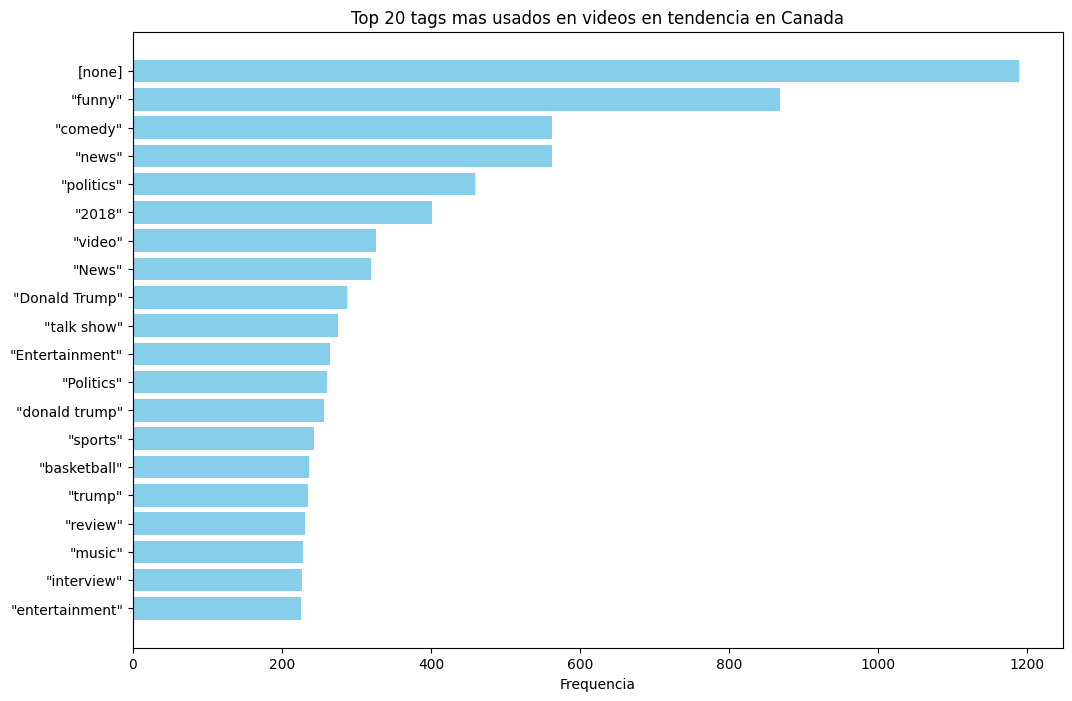

In [290]:
df = data.copy()

df = df.dropna(subset=['tags'])

df['tags'] = df['tags'].apply(lambda x: x.split('|')) #separar por |

tag_counter = Counter([tag for tags in df['tags'] for tag in tags])  #contar frecuencias de tag

common_tags = tag_counter.most_common(20) #etiquetaas mas comunes
common_tags_df = pd.DataFrame(common_tags, columns=['Tag', 'Frequency'])

plt.figure(figsize=(12, 8))
plt.barh(common_tags_df['Tag'], common_tags_df['Frequency'], color='skyblue')
plt.xlabel('Frequencia')
plt.title('Top 20 tags mas usados en videos en tendencia en Canada')
plt.gca().invert_yaxis()
plt.show()




**¿En que horarios se publicaron los videos en tendencia?**

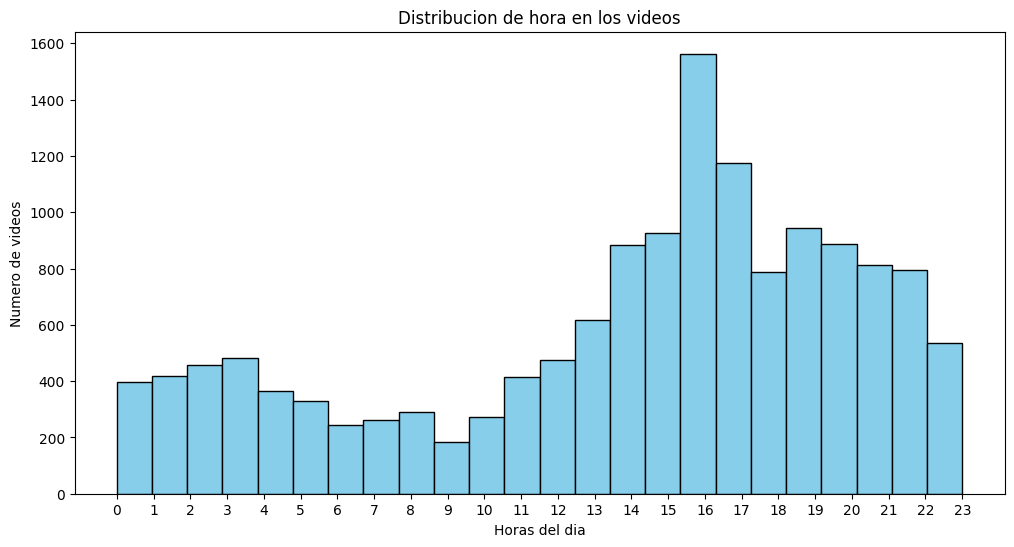

In [194]:
df = data.copy()
df['publish_time'] = pd.to_datetime(df['publish_time'])

df['publish_hour'] = df['publish_time'].dt.hour

#se agrupa por hora de publicacion 
hourly_trends = df.groupby('publish_hour').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.hist(df['publish_hour'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Horas del dia')
plt.ylabel('Numero de videos')
plt.title('Distribucion de hora en los videos')
plt.xticks(range(0, 24))
plt.show()


# Preparacion de los datos

**Verificar la cantidad de datos nulos**

In [291]:
## Calcula los porcentajes de missings por variable

def fx_porc_missings(data, only_missings = False):

    df_vars_missings = pd.concat([pd.DataFrame(data.isnull().sum(), columns = ['n_nulos']),
           pd.DataFrame(100*data.isnull().sum()/len(data), columns = ['%Total'])], axis = 1)
    if only_missings:
        return(df_vars_missings[df_vars_missings["n_nulos"]!=0])
    else:
        return(df_vars_missings)
    
fx_porc_missings(data)

,n_nulos,%Total
video_id,0,0.000000
trending_date,0,0.000000
title,0,0.000000
channel_title,0,0.000000
category_id,0,0.000000
publish_time,0,0.000000
tags,0,0.000000
views,0,0.000000
likes,0,0.000000
dislikes,0,0.000000


<AxesSubplot:>

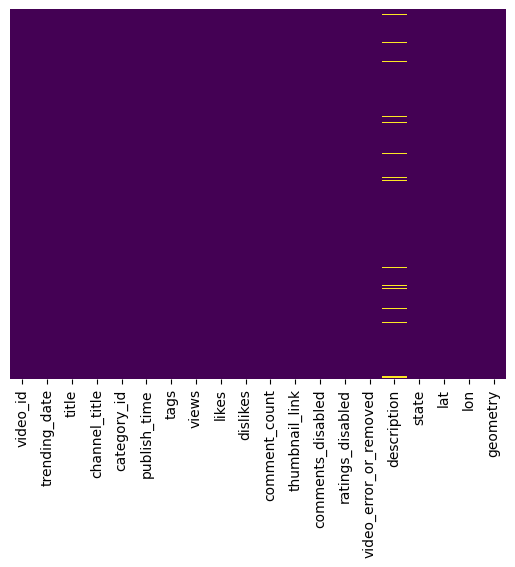

In [292]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [293]:
data['description'].nunique()

12385

Entonces, se observa que la única columna con datos faltantes de la de "description". En total, esta columna tiene 741 valores nulos, lo cual representa el 5.104% del total.

Además de ello, más de la mitad de sus valores son únicos, por lo que reemplazarlos no es una opción conveniente.

Por ello se eliminarán las filas que tengas datos nulos

In [294]:
data.dropna(subset=['description'], inplace=True)

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13775 entries, 5 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                13775 non-null  object        
 1   trending_date           13775 non-null  datetime64[ns]
 2   title                   13775 non-null  object        
 3   channel_title           13775 non-null  object        
 4   category_id             13775 non-null  object        
 5   publish_time            13775 non-null  object        
 6   tags                    13775 non-null  object        
 7   views                   13775 non-null  int64         
 8   likes                   13775 non-null  int64         
 9   dislikes                13775 non-null  int64         
 10  comment_count           13775 non-null  int64         
 11  thumbnail_link          13775 non-null  object        
 12  comments_disabled       13775 non-null  bool  

In [200]:
fx_porc_missings(data)

,n_nulos,%Total
video_id,0,0.0
trending_date,0,0.0
title,0,0.0
channel_title,0,0.0
category_id,0,0.0
publish_time,0,0.0
tags,0,0.0
views,0,0.0
likes,0,0.0
dislikes,0,0.0


**Busqueda de valores fuera de rango**

La unicas variables que podrian tener outliers serian likes, dislikes, comment_count. Por ello graficaremos un boxplot para identificar si tienen o no

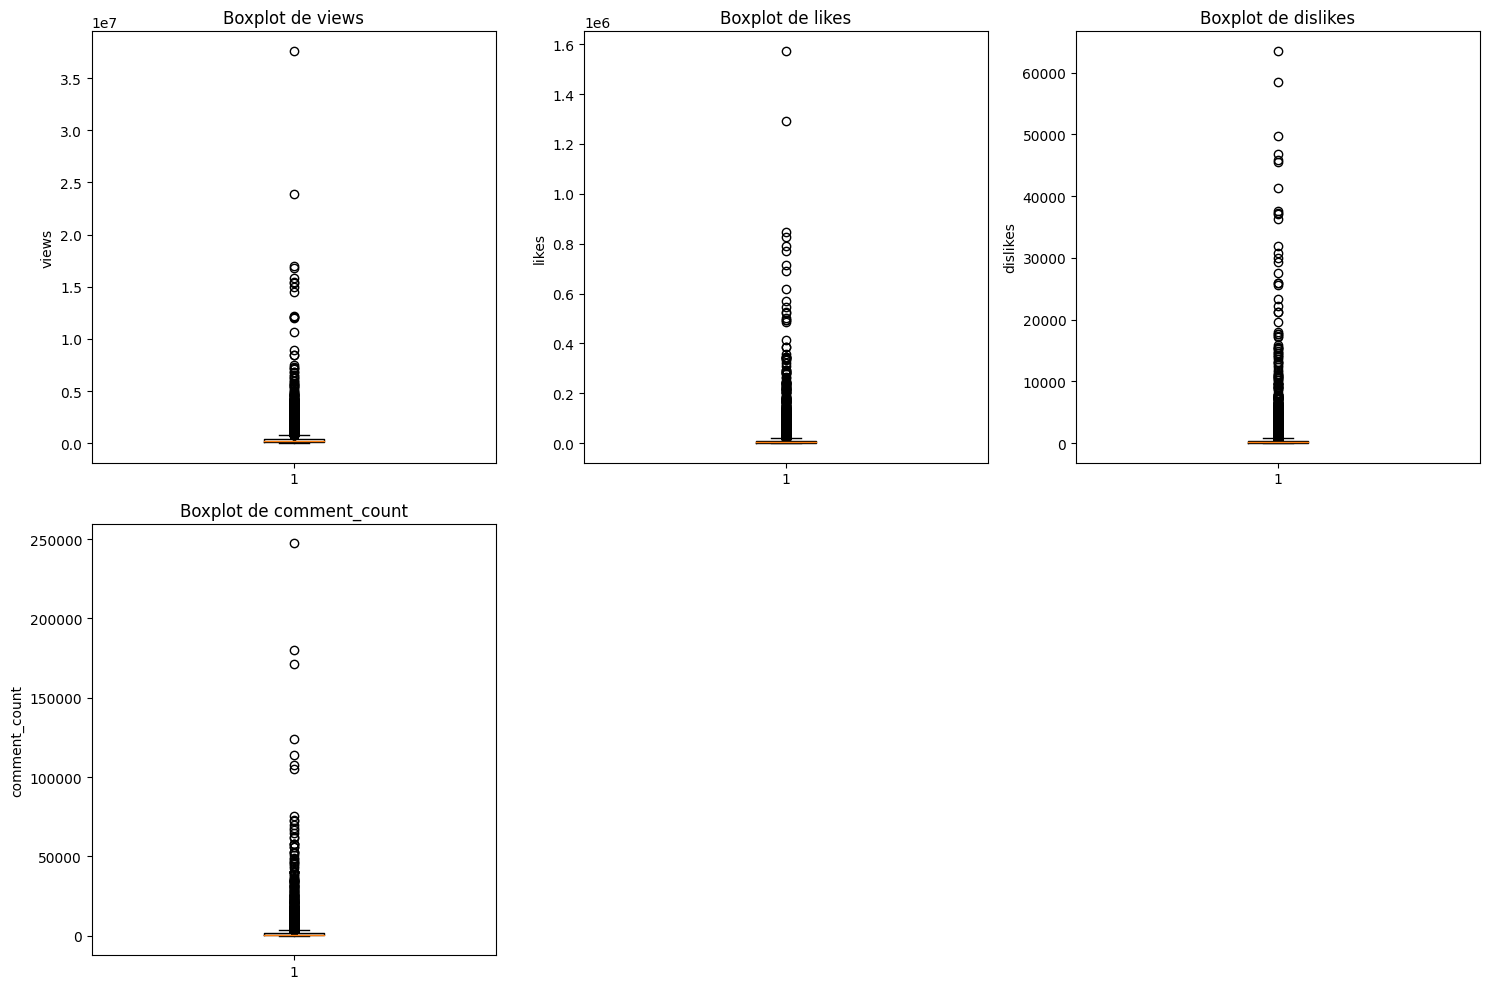

In [296]:
cols = ['views', 'likes', 'dislikes', 'comment_count']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(cols):
    row, col_position = divmod(i, 3)
    axes[row, col_position].boxplot(data[col].dropna())
    axes[row, col_position].set_title(f'Boxplot de {col}')
    axes[row, col_position].set_ylabel(col)

for j in range(len(cols), 6):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [297]:
def num_outliers(df, columns):
    outlier_counts = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    
    return outlier_counts

num_outliers(data, cols)

{'views': 1186, 'likes': 1392, 'dislikes': 1397, 'comment_count': 1272}

In [298]:
data.describe()

,views,likes,dislikes,comment_count,lat,lon
count,1.377500e+04,1.377500e+04,13775.000000,13775.000000,13775.000000,13775.000000
mean,3.508786e+05,1.064379e+04,452.047985,1591.151869,51.964507,-88.654415
std,7.774226e+05,3.568588e+04,1816.619975,5144.603814,7.154890,25.060352
min,1.023000e+03,0.000000e+00,0.000000,0.000000,44.566645,-139.000002
25%,7.687200e+04,9.920000e+02,49.000000,200.000000,46.249282,-110.733329
50%,1.697340e+05,3.213000e+03,135.000000,607.000000,49.822578,-81.236083
75%,3.745815e+05,9.416500e+03,356.000000,1475.000000,53.016698,-64.347995
max,3.759712e+07,1.573023e+06,63531.000000,247214.000000,68.767467,-57.426919


Como se puede observar, hay datos atipicos en esas 4 variables. Por ello se decidio aplicar una técnica para que los outliers no afecten mucho el proceso. Estan consistira en reemplazar los valores atipicos que son menores al mínimos por el cuartil 1 y los valores atípicos que son mayores al máximos por el cuartil 3.

Al reemplazar los valores, se busca mantener la integridad del conjunto de datos, para asegurar que el análisis posterior sea más representativo y fiable.

In [299]:
def reemplazo_outliers(df, columnas):
    df_reemplazado = df.copy()
    
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        df_reemplazado.loc[df[col] < limite_inferior, col] = Q1
        df_reemplazado.loc[df[col] > limite_superior, col] = Q3
    
    return df_reemplazado

In [300]:
data = reemplazo_outliers(data, cols)

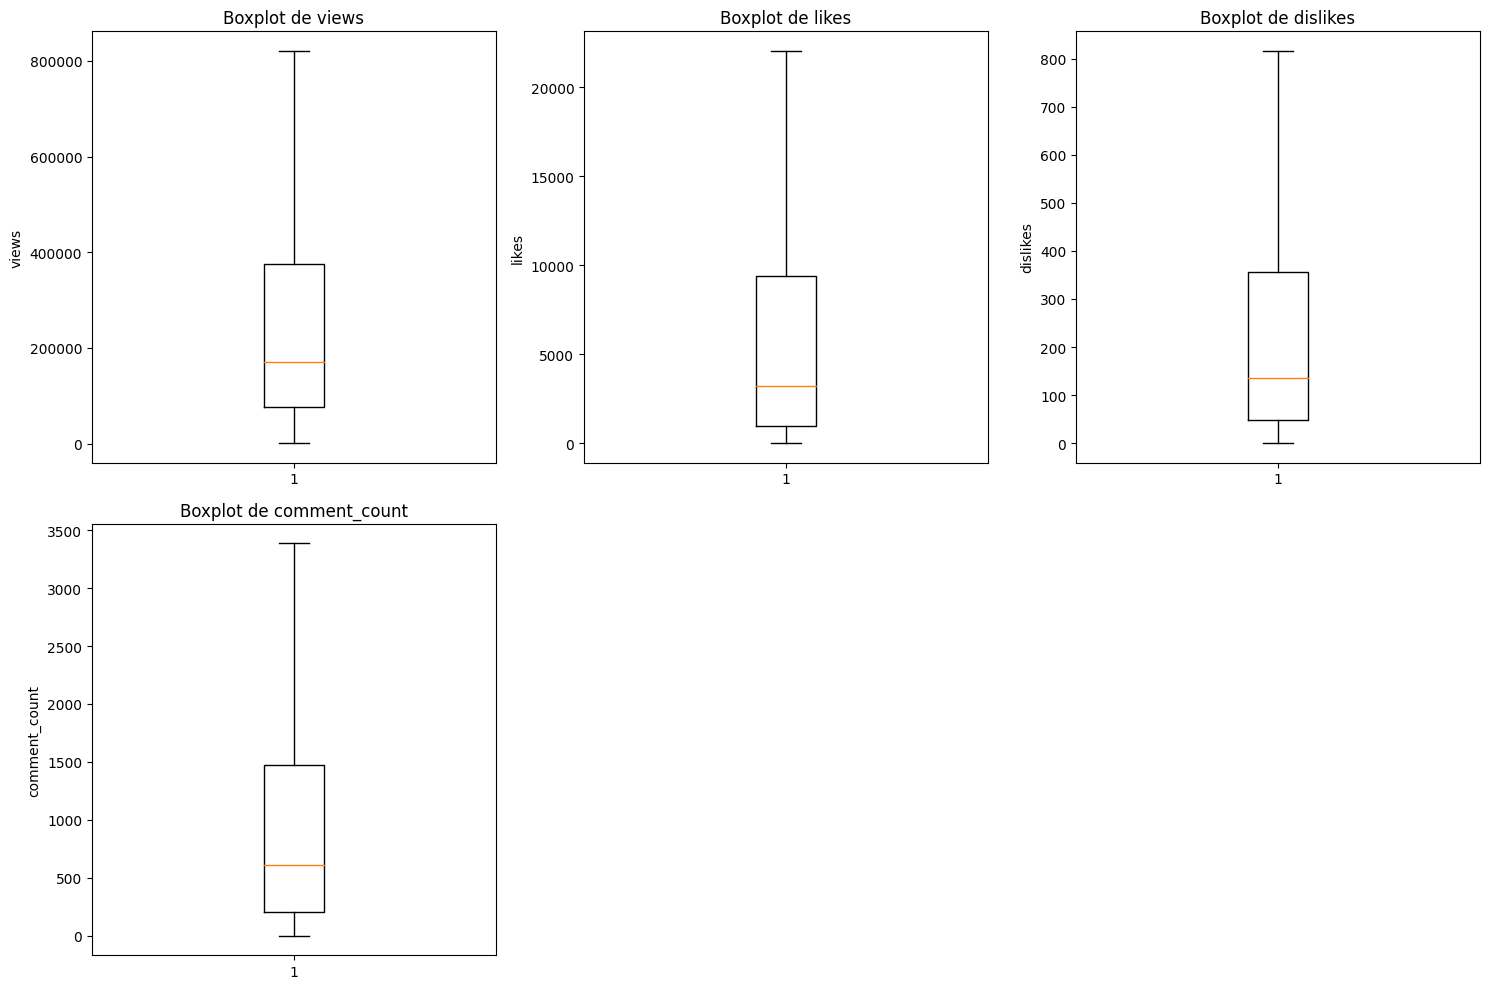

In [301]:
cols = ['views', 'likes', 'dislikes', 'comment_count']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(cols):
    row, col_position = divmod(i, 3)
    axes[row, col_position].boxplot(data[col].dropna())
    axes[row, col_position].set_title(f'Boxplot de {col}')
    axes[row, col_position].set_ylabel(col)

for j in range(len(cols), 6):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

**Transformacion de datos**

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13775 entries, 5 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                13775 non-null  object        
 1   trending_date           13775 non-null  datetime64[ns]
 2   title                   13775 non-null  object        
 3   channel_title           13775 non-null  object        
 4   category_id             13775 non-null  object        
 5   publish_time            13775 non-null  object        
 6   tags                    13775 non-null  object        
 7   views                   13775 non-null  float64       
 8   likes                   13775 non-null  float64       
 9   dislikes                13775 non-null  int64         
 10  comment_count           13775 non-null  int64         
 11  thumbnail_link          13775 non-null  object        
 12  comments_disabled       13775 non-null  bool  

In [303]:
categoricas

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,geometry
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,Newfoundland And Labrador,POINT (-57.42691878 49.17440025)
12,FyZMnhUtLfE,17.14.11,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,2017-11-12T16:00:01.000Z,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...,Ontario,POINT (-80.84998519 44.56664532)
13,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,Quebec,POINT (-64.34799504 49.82257774)
16,gifPYwArCVQ,17.14.11,Fake Pet Smart Employee Prank!,NELK,23,2017-11-13T01:30:01.000Z,"prank|""pranks""|""nelk""|""nelkfilmz""|""nelkfilms""",https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg,False,False,False,3 Days left to cop NELK merch: https://nelk.ca...,British Columbia,POINT (-116.516697 49.09996035)
17,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...,Nunavut,POINT (-81.23608303 68.76746684)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40875,7E1np354AEc,18.14.06,Вечер с Владимиром Соловьевым от 13.06.2018,Россия 24,24,2018-06-13T23:53:29.000Z,"поединок|""михеев""|""полный контакт""|""вечер с вл...",https://i.ytimg.com/vi/7E1np354AEc/default.jpg,False,False,False,Вечер с Владимиром Соловьевым от 13.06.2018\rП...,Prince Edward Island,POINT (-63.13132512 46.24928164)
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Manitoba,POINT (-96.88332178 50.15002545)
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,Newfoundland And Labrador,POINT (-57.42691878 49.17440025)
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,Yukon,POINT (-139.0000017 61.35037539)


In [304]:
numericas

,views,likes,dislikes,comment_count,lat,lon
5,1309699,103755,4613,12143,49.174400,-57.426919
12,158815,218,30,186,44.566645,-80.849985
13,5718766,127477,7134,8063,49.822578,-64.347995
16,557883,44558,621,9619,49.099960,-116.516697
17,1496225,16116,236,605,68.767467,-81.236083
...,...,...,...,...,...,...
40875,201847,1568,407,537,46.249282,-63.131325
40876,80685,1701,99,1312,50.150025,-96.883322
40877,103339,460,66,51,49.174400,-57.426919
40879,115225,2115,182,1672,61.350375,-139.000002


**Variables numericas**

In [305]:
numericas = ['views','likes','dislikes', 'comment_count', 'lat', 'lon']

<AxesSubplot:>

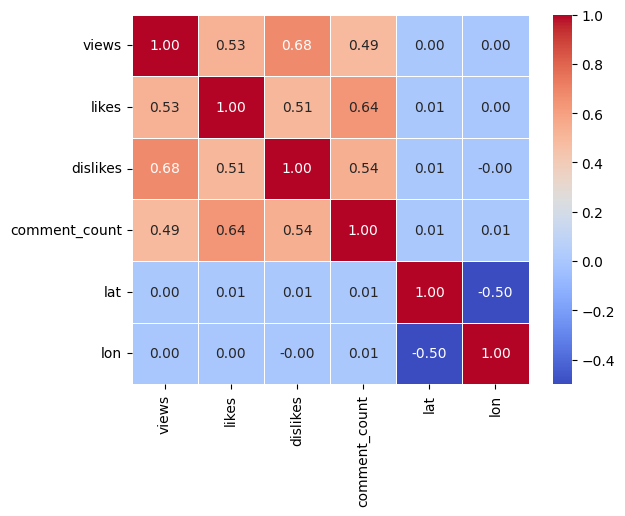

In [306]:
correlation_matrix = data[numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

**Transformacion de las variables**

In [307]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
5,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",374581.5,9416.5,356,1475,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,Newfoundland And Labrador,49.174400,-57.426919,POINT (-57.42691878 49.17440025)
12,FyZMnhUtLfE,2017-11-14,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,2017-11-12T16:00:01.000Z,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",158815.0,218.0,30,186,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...,Ontario,44.566645,-80.849985,POINT (-80.84998519 44.56664532)
13,7MxiQ4v0EnE,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",374581.5,9416.5,356,1475,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,Quebec,49.822578,-64.347995,POINT (-64.34799504 49.82257774)
16,gifPYwArCVQ,2017-11-14,Fake Pet Smart Employee Prank!,NELK,23,2017-11-13T01:30:01.000Z,"prank|""pranks""|""nelk""|""nelkfilmz""|""nelkfilms""",557883.0,9416.5,621,1475,https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg,False,False,False,3 Days left to cop NELK merch: https://nelk.ca...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
17,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",374581.5,16116.0,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...,Nunavut,68.767467,-81.236083,POINT (-81.23608303 68.76746684)


In [308]:
videos_df = data.copy()
columnas_relevantes = ['likes', 'dislikes', 'comment_count', 'views']
videos_df = videos_df[columnas_relevantes]


In [309]:
X = videos_df.drop('views', axis=1)
y = videos_df['views']


In [310]:
#numericas
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Modelo**

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [312]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [313]:
slope = model.coef_  # w1
intercept = model.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [ 41280.9469874  101408.63833138   9204.83344682]
El término independiente de la recta 'w0' es:  226357.68411947537


In [314]:
#Predicciones
y_pred = model.predict(X_test)


Text(0, 0.5, 'Y Predichos')

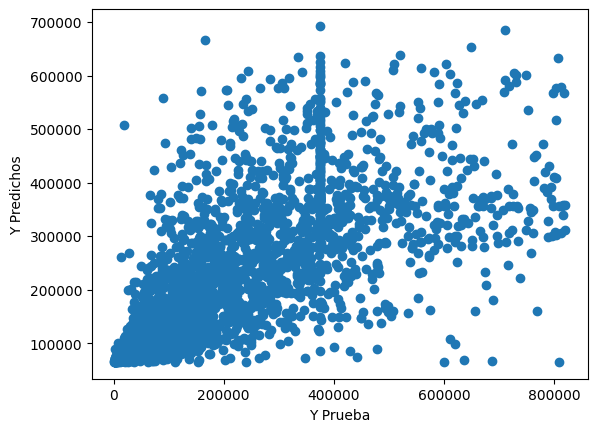

In [315]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

In [316]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.
                       
                       mean_squared_error(y_test, y_pred)))

MAE: 91395.61501541096
MSE: 17026799489.509556
RMSE: 130486.77898357961
